# Build your first Neural Network
In this notebook, you will build your first neural network that will perform the function of a logical gate.
You will implement this neural network from scratch and this will let you have a better understending of the different concepts you have seen in this chapter such as parameters' initialization, forward, and backward progpagation.  

## Logic Gates (Reminder)
The table below summerizes the existing logical gates and their truth tables:
![Logic Gates!](./images/logic_gates.jpeg "Logic Gates")

## The Neural Network Architecture
We are going to implement an AND gate, you can look at its truth table above. Our neural network will have 1 hidden layer which has 2 neurons, and its input will have two features.
![AND Gate NN architecture!](./images/AND_Gate_NN_architecture.png "AND Gate NN architecture")
The goal is to automatically adjust those weights and biases by executing forward and backward propagation process on data points that reprensent the AND gate truth's table so that the output of this NN will match the AND gate output.

## Let's start

As we are building our neural network from scratch, the only library we need to import is numpy, which will make implementing our calculations easier, and their execution faster.

In [1]:
import numpy as np

Now, let's implement the sigmoid activation function. Here is its formula:
$S(x)= \frac {1}{1+e^{-x}}$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Let's define a function that initializes the parameters of our neural network.
- All the weights will be initialized randomly following the standard normal distribution.
- Bias values will be initialized to 0

To keep the function we are defining usable if we have more or less input or output features, or if we decide to add more neurons in the hidden layer, we pass three parameters to the function:

- inputSize: specifies how many features does the input have. (2 in our case)
- hiddenLayerSize: specifies how many neurons the hidden layer have. (2 in our case)
- outputSize: specifies how many features does the output have. (1 in our case)

In [3]:
def initializeParameters(inputSize, hiddenLayerSize, outputSize):
    W1 = np.random.randn(hiddenLayerSize, inputSize)
    W2 = np.random.randn(outputSize, hiddenLayerSize)
    b1 = np.zeros((hiddenLayerSize, 1))
    b2 = np.zeros((outputSize, 1))
    # We store our parameters in a dict and return them
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

The next step is to implement the forward propogation function.
- We calculate $A_{2}$ as detailed in the architecture figure
- We save all the calculations' results so won't have to calculate them again during the backpropagation in the cache variable
- We calculate the cross entropy for our data points: $-(y \times log(\hat{y}) + (1-y) \times (log(1-\hat{y}))$
- The cost is defined as the mean of these cross entropies, so we devide their sum by the number of our data points.

In [4]:
def forwardPropagation(X, Y, parameters):
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    cross_entropies = - (np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2)))
    cost = np.sum(cross_entropies) / X.shape[1]
    return cost, cache, A2


And now, we implement the backward propagation function.
- The cached results from the forward propagation are passed to the backward as parameters
- The formulas of the gradients are detailed in the previous lesson, we just need to implement them.
- We set the $keepdims$ parameter to True when summing to ensure the resulted array will have the same dimensions as the input array. For example summing a (2,3) matrix over axis 1 while give us a (2,1) matrix when $keepdims$ is set to true instead of a 1D array with 2 elements.
- Finally, we return the gradients as a dict.

In [5]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

We update the parametes using the gradient descent algorithm after each iteration, let's implement a function that updates the parameters.

In [6]:
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

Now that we have implemented all the prerequesties to train and test our neural network. Let's define the data point that we will train it on!
As we want our neural network to perform the AND operation, we train it the four possible inputs of this logic gate.
- $0 \wedge  0 = 0$
- $0 \wedge  1 = 0$
- $1 \wedge  0 = 0$
- $1 \wedge  1 = 1$

In [7]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) 
Y = np.array([[0, 0, 0, 1]])

Now, we initilize the model's parameters

In [8]:
hiddenLayerSize = 2 # number of hidden layer neurons (2)
inputSize = X.shape[0] # number of input features (2)
outputSize = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputSize, hiddenLayerSize, outputSize)

And we start the training:
- We will run 100000 iterations with a learning rate of 0.01. 
- We keep track of the losses so we can plot them later.
- The training consists of running a forward and a backward pass on all the data points and update the parameters at each iteration. 

In [9]:
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)


We evaluate the performance of our model by visualizing the change in the loss value after each epoch.

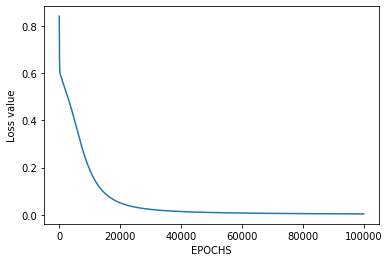

In [11]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

We can test our model by running a forward pass on data points of our choice.

In [12]:
X = np.array([[0, 1, 1], [0, 0, 1]])
Y = np.array([[0,0,1]])
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(cost)
print(prediction)

0.0036069299543274006
[[0. 0. 1.]]
